In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

#### Let's load the Nashville zipcode data and look at the first few rows
- geopandas reads files with the `read_file()` method
- The zipcode data was downloaded from https://data.nashville.gov/General-Government/Zip-Codes/u7r5-bpku


In [2]:
crosswalks = gpd.read_file('../data/crosswalks.geojson')
print(crosswalks.crs)
crosswalks.head(5)

EPSG:4326


,OBJECTID,Inspector,AuditDate,FeatureType,Width,CrossSlope,PaintCondition,GlobalID,created_user,created_date,last_edited_user,last_edited_date,AssetID,geometry
0,1,RL,"Tue, 13 Jun 2023 15:04:16 GMT",L,10.0,<= 2%,P,2667456a-1707-4115-a04f-db172e8f0a02,ENORTON,"Thu, 22 Jun 2023 13:53:20 GMT",ENORTON,"Thu, 25 Jul 2024 13:51:08 GMT",CRW-02558,POINT Z (-86.78686 36.17577 132.66200)
1,2,CW,"Mon, 02 Oct 2023 20:01:36 GMT",L,10.0,2% - 5%,P,e5e4167a-9076-4183-8ada-767f4d6f1ce0,ENORTON,"Mon, 09 Oct 2023 15:25:06 GMT",ENORTON,"Mon, 15 Jul 2024 13:25:22 GMT",CRW-01838,POINT Z (-86.74983 36.17845 0.00000)
2,3,JoS,"Thu, 17 Aug 2023 16:44:06 GMT",L,10.0,2% - 5%,P,d6701587-b4c3-42f8-abd8-55ce437214f2,ENORTON,"Mon, 21 Aug 2023 16:38:46 GMT",ENORTON,"Mon, 15 Jul 2024 14:43:01 GMT",CRW-01515,POINT Z (-86.79220 36.14801 0.00000)
3,4,JE,"Wed, 21 Jun 2023 15:39:03 GMT",T,8.0,2% - 5%,P,35da8238-790d-45fc-ac47-ff59c25d7dbe,ENORTON,"Wed, 28 Jun 2023 15:39:38 GMT",ENORTON,"Thu, 25 Jul 2024 13:10:40 GMT",CRW-00559,POINT Z (-86.78275 36.16469 0.00000)
4,5,JS,"Thu, 01 Jun 2023 17:30:17 GMT",L,10.0,2% - 5%,P,8f99f75c-ccac-4827-9dc9-f33b75a10b5b,ENORTON,"Mon, 05 Jun 2023 23:20:39 GMT",ENORTON,"Thu, 25 Jul 2024 14:25:53 GMT",CRW-00277,POINT Z (-86.78153 36.15782 0.00000)


In [3]:
type(crosswalks)

geopandas.geodataframe.GeoDataFrame

#### Now let's look at the difference between calling the first geometry variable.....


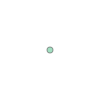

In [15]:
crosswalks.loc[0, 'geometry']

#### ...and printing it


In [5]:
print(crosswalks.loc[0, 'geometry'])

POINT Z (-86.7868646371625 36.1757740109776 132.661999999997)


#### Plotting a GeoDataFrame is as easy as calling the GeoPandas .plot() function


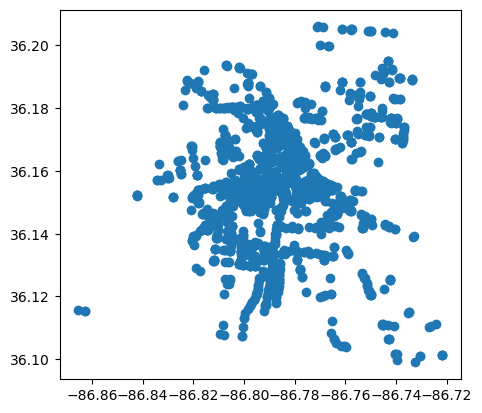

In [6]:
crosswalks.plot();

#### Add information and styling 
- set the `column =` to a column in the GeoDataFrame to color by
- change the [colormap](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html) 
- pass in keywords to tweak the legend created by [`matplotib`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html)


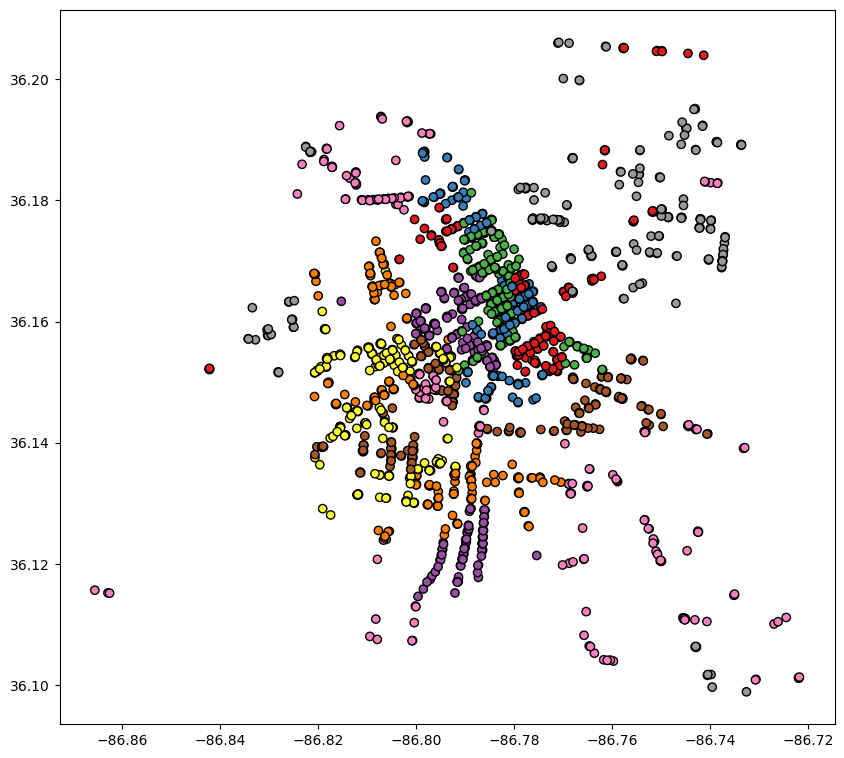

In [27]:
#geopandas will take care of legend styling if you pass a dict of keywords

leg_kwds = {'title': 'Crosswalks', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.01), 'ncol': 2}

crosswalks.plot(column = 'AssetID', figsize=(10, 10),
              edgecolor = 'black',
              legend = False, legend_kwds = leg_kwds, 
              cmap = 'Set1')
plt.show()

#### Next you will read in the bus stop data
- downloaded from https://data.nashville.gov/Transportation/Regional-Transportation-Authority-Bus-Stops/p886-fnbd
- cleaned:
    - rename columns 
    - drop unwanted columns 
    - parse `lat` and `lng` columns from `location`
- print the shape 
- take a look at the first 3 rows

In [17]:
crosswalks2 = pd.read_csv('../data/crosswalks.csv')
print(crosswalks2.shape)
crosswalks2=crosswalks2.rename(columns = {'x':'long', 'y':'lat'})
crosswalks2.head(3)

(1823, 15)


,OBJECTID,Survey By,Date Audited,Type of Crosswalk,Width of Crosswalk,Cross Slope of Crosswalk,Crosswalk Paint Condition,GlobalID,created_user,created_date,last_edited_user,last_edited_date,Asset ID,long,lat
0,1,RL,6/13/2023 3:04:16 PM,L,10.0,<= 2%,P,2667456a-1707-4115-a04f-db172e8f0a02,ENORTON,6/22/2023 1:53:20 PM,ENORTON,7/25/2024 1:51:08 PM,CRW-02558,1.736265e+06,671594.557461
1,2,CW,10/2/2023 8:01:36 PM,L,10.0,2% - 5%,P,e5e4167a-9076-4183-8ada-767f4d6f1ce0,ENORTON,10/9/2023 3:25:06 PM,ENORTON,7/15/2024 1:25:22 PM,CRW-01838,1.747203e+06,672482.454964
2,3,JoS,8/17/2023 4:44:06 PM,L,10.0,2% - 5%,P,d6701587-b4c3-42f8-abd8-55ce437214f2,ENORTON,8/21/2023 4:38:46 PM,ENORTON,7/15/2024 2:43:01 PM,CRW-01515,1.734609e+06,661498.782705


In [18]:
crosswalks2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1823 entries, 0 to 1822
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OBJECTID                   1823 non-null   int64  
 1   Survey By                  1814 non-null   object 
 2   Date Audited               1816 non-null   object 
 3   Type of Crosswalk          1816 non-null   object 
 4   Width of Crosswalk         1822 non-null   float64
 5   Cross Slope of Crosswalk   1812 non-null   object 
 6   Crosswalk Paint Condition  1806 non-null   object 
 7   GlobalID                   1823 non-null   object 
 8   created_user               1820 non-null   object 
 9   created_date               1820 non-null   object 
 10  last_edited_user           1823 non-null   object 
 11  last_edited_date           1823 non-null   object 
 12  Asset ID                   1823 non-null   object 
 13  long                       1823 non-null   float

- you want the CRS for the bus stops to match the CRS in the zipcodes GeoDataFrame 


In [23]:
crosswalks.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

#### The `GeoDataFrame()` constructor needs 3 parameters:
 - a DataFrame
 - a coordinate reference system
 - a geometry (we will use the geopandas `points_from_xy()` method to create a Point geometry)

In [31]:
cw2 = gpd.GeoDataFrame(crosswalks2, 
                           crs = crosswalks.crs, 
                           geometry = gpd.points_from_xy(crosswalks.lng, crosswalks.lat))

AttributeError: 'GeoDataFrame' object has no attribute 'lng'

In [29]:
type(cw2)

NameError: name 'cw2' is not defined

#### Now you are ready to combine bus stops and zipcodes with a spatial join
- first a little clean up for the zipcodes
    - just keep the zip, po_name, and geometry columns
- then construct the join 
    - keep in mind that you want to find the **bus stops within a zip code polygon**
    - the geometry for the new (combined) GeoDataFrame comes from the left GeoDataFrame


In [ ]:
zipcodes = zipcodes[['zip', 'po_name', 'geometry']]

In [ ]:
stops_by_zip = gpd.sjoin(bus_geo, zipcodes, predicate = 'within')

In [ ]:
stops_by_zip.head()

#### Now that the data is joined spatially you can count the bus stops by zip code  and see how many stops are within each polygon 
- using the `value_counts()` method


In [ ]:
stops_by_zip['zip'].value_counts()

#### Let's take a closer look at the 272 bus stops in the 37207 zip code
- filter the stops_by_zip data to just get bus stops in 37207
- filter the zip code geodataframe to just the polygon (row) for 37207


In [ ]:
stops_in_37207 = stops_by_zip.loc[stops_by_zip['zip'] == '37207']
stops_in_37207.shape

In [ ]:
polygon37207 = zipcodes.loc[zipcodes['zip'] == '37207']
polygon37207.shape

#### Now plot these two together
- first plot the polygons for 37207 and make them light green
- next plot the points for the bus stops and color them by route

In [ ]:
#fig, ax = matplotlib.subplots()
ax = polygon37207.plot(figsize = (8, 10), color = 'lightgreen')
stops_in_37207.plot( ax = ax, column = 'route');
plt.show();

#### We're getting there! It would be helpful to have streets, though wouldn't it? We can add a street map with the folium package.

#### folium maps require a center point for the street map. 
- Make use of a GeoSeries attribute (.centroid) which gives the center of a polygon
- Since there are two polygons which should we use?

In [ ]:
polygon37207.geometry.centroid

In [ ]:
#find the center of the larger (more southern) polygon and look at it
center = polygon37207.geometry.centroid[42]
print(center)

#### Folium requires a location point as an array 
- with *latitude* first
- but shapely Points have *longitude* first 

In [ ]:
# reverse the order when constructing the array for folium location
area_center = [center.y, center.x]

# check the order of area_center, the location for our folium map
print(area_center)

#### To create a folium map just call the folium `Map()` constructor
- `location` is the only argument required by the constructor
    - Set `area_center` as the `location` of the folium map. 
- `zoom_start` is an optional argument 
    - A setting of 12 should get us nice and close

In [ ]:
#create our map of Nashville Zip Code 37207 and show it
map_37207 = folium.Map(location =  area_center, zoom_start = 12)
map_37207

#### Next, let's add our 37207 polygon and bus stop markers.

#### `itterows()` is a generator that iterates through the rows of a DataFrame and returns a tuple with the row id and row values. 
- Below, we are printing the row values for the first 3 row as we iterate through the GeoDataFrame of bus stops in 37207. 
- This idea will be helpful for creating our markers!

In [ ]:
i = 0
for row_index, row_values in stops_in_37207.iterrows():
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

#### Create map_37207 again with additional features:
- add the zipcode area outline (polygon_37207)
- iterate through the stops_in_37207 to
    - create location from each lat and lng
    - create a popup from the stop column
    - create a custom icon if you want with [font-awesome](https://fontawesome.com/v4.7.0/icons/)
    - build a marker from each location and popup and (optionally) your custom icon 
    - add the marker to  `map_37207`
- display `map_37207`

In [ ]:
#draw our zip code area: 37207
map_37207 = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(polygon37207).add_to(map_37207)

#iterate through stops_in_37207 to create locations and markers 
#for each bus stop
#remember for Folium locations, lat is listed first!!

for row_index, row_values in stops_in_37207.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['route'])
    icon=folium.Icon(color="blue",icon="bus", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_37207)
map_37207.save('../maps/map37207.html')

#display our map
map_37207

#### If you have a lot of markers, you might want to use marker clusters
- Folium has `MarkerCluster()` and `FastMarkerCluster()`
- Construct a `MarkerCluster()` 
    - construct a `MarkerCluster()` and `.add_to()` the map
    - when you loop through the data and create markers add those to the marker cluster
- Construct a `FastMarkerCluster()` by passing a list of locations

#### You can save your map as an html file and it will retain the interactive qualities

In [ ]:
folium.Map?

In [ ]:
cluster_map_37207 = folium.Map(location =  area_center, zoom_start = 12)

#create a marker cluster
marker_cluster = MarkerCluster().add_to(cluster_map_37207)

folium.GeoJson(polygon37207).add_to(cluster_map_37207)

# inside the loop add each marker to the cluster
for row_index, row_values in stops_in_37207.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['route'])
    icon=folium.Icon(color="blue",icon="bus", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop,
    icon = icon) 
    
    marker.add_to(marker_cluster)

    
#save an interactive HTML map by calling .save()
cluster_map_37207.save('../maps/cluster37207.html')

cluster_map_37207  

In [ ]:
#draw our zip code area: 37207
map_37207 = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(polygon37207).add_to(map_37207)

#create a list of locations and pass them to FastMarkerCluster()
locations = stops_in_37207[['lat', 'lng']].values.tolist()
map_37207.add_child(
    FastMarkerCluster(locations)
)



#display our map
map_37207